# Exploratory Data Analytics in Agriculture
The climate and local weather conditions have a key influence upon agriculture. Weather events such as heat, drought, heavy rain or frost have always governed the everyday life of farmers. 
There is probably no industry that is as closely linked to the weather as agriculturt. These data are collected by weather stations, The results of this data analysis provide significant insights to farmers and agronomists about how to improve the production, minimise the farming operational costs, manage risks, and protect the environment. 

## 1. Ask

### Objectives:

* Create a large database that contains local weather data.
* Generate descriptive statistics.
* Calculate historical weather.
<ul>
    <li>Calculate annual indicators.</li>
    <li>Calculate weekly indicators for 2023-7-7 to 2024-7-7.</li>
</ul>
* Create meaningful visualizations.
* Document the data analysis process.

### Development environment

#### JupyterLab
 Interactive development environment for notebooks, code, and data. 

#### Python’s libraries
 <ul>
    <li><b>Pandas:</b> provides high-performance, easy-to-use data structures and data analysis tools</li>
    <li><b>Matplotlib.Pyplot:</b> provides an implicit, MATLAB-like, way of plotting.</li>
     <li><b>Matplotlib.dates:</b>  date plotting capabilities.</li>
    <li><b>Numpy:</b> support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions</li>
</ul>
  

## 2. Prepare

### Weather station documentation

<ul>
    <li>Weather station: Red Agrometeorológica de INIA, Copihue, Retiro.</li>
    <li>Location: latitude -36.07,  longitude -71.75, elevation 162 m.</li>    
    <li>Source: INIA www.agrometeorologia.cl</li>
    <li>File format: csv.</li>
</ul>

### Files

<ol>
    <li>pre-cleaned 'chill_hours_retiro_maule_2019-2024.csv'</li>
    <li>pre_cleaned 'degree_days_retiro_maule_2019-2024.csv' </li>
    <li>raw 'agrometeorologia_tem_precip.csv''</li>
</ol>

### Metadata

<ul>
    <li>time: UTC-4</li>
    <li>temp: air temperature (°C)</li>
    <li>t_min: minimum air temperature (°C)</li>
    <li>t_max: maximum air temperature (°C)</li>
    <li>precip: precipitation (mm)</li>
    <li>degree_days_to_5: degree days to 5°C</li>
    <li>degree_days_to_10: degree days to 10°C</li>
    <li>degree_days_to_12.5: degree days to 12.5°C</li>
    <li>chill: chill hours to 7°C</li>
    <li>Temporal Level: Daily.</li>
    <li>Time Extent: January 1, 2019 to July 17, 2024.</li>
</u>

### Import python libraries:

In [665]:
import pandas as pd #  for data manipulation and analysis
import matplotlib.pyplot as plt # interface to matplotlib
import numpy as np #  for multi-dimensional arrays and matrices
import matplotlib.dates as mdates # for Formatting date ticks

## 3. Process

### Data cleaning
* Detect and correct corrupt or inaccurate data, or removing unnecessary data

#### Read files

##### Read temperature - precipitation file

In [670]:
pd.read_csv('data/agrometeorologia_tem_precip.csv', on_bad_lines='skip') # dataset glance

,www.agrometeorologia.cl,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Red Agrometeorológica de INIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Generado el 17-07-2024 15:44:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Copihue, Retiro",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tiempo UTC-4,Temperatura del Aire ºC,Temperatura del Aire Mínima ºC,Temperatura del Aire Máxima ºC,Precipitación Acumulada mm,Temperatura del Aire % de datos,Temperatura del Aire Mínima % de datos,Temperatura del Aire Máxima % de datos,Precipitación Acumulada % de datos
...,...,...,...,...,...,...,...,...,...
2029,17-07-2024,4.2,1.8,6.5,0.2,54,54,54,54
2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2032,El uso de los datos en publicaciones debe seña...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Skip header and Create df dataframe

In [672]:
# skip rows 0 to 4 and create df dataframe
frame = pd.read_csv('data/agrometeorologia_tem_precip.csv', header=5, usecols=[0,1,2,3,4])

#### Rename columns
Rename columns meaningfully, in lowercase, short words.

In [674]:
frame.columns # show current columns names.

Index(['Tiempo UTC-4', 'Temperatura del Aire ºC',
       'Temperatura del Aire Mínima ºC', 'Temperatura del Aire Máxima ºC',
       'Precipitación Acumulada mm'],
      dtype='object')

In [675]:
# rename columns
frame = frame.rename(columns={'Tiempo UTC-4':'time', 'Temperatura del Aire ºC':'temp',
       'Temperatura del Aire Mínima ºC':'t_min', 'Temperatura del Aire Máxima ºC':'t_max',
       'Precipitación Acumulada mm':'precip'}) 

#### Remove null data
In this project we are not going to infer data but rather eliminate it

In [677]:
frame = frame.dropna() # get a DataFrame with NA entries dropped from it 

#### Convert time to a pandas datetime object

In [679]:
frame['time'] = pd.to_datetime(frame['time'], dayfirst=True)

In [680]:
frame = frame.set_index('time')

In [681]:
frame.head()

,temp,t_min,t_max,precip
time,,,,
2019-01-01,20.2,11.8,28.6,0.0
2019-01-02,17.7,9.3,26.1,0.0
2019-01-03,18.8,9.4,28.2,0.0
2019-01-04,21.0,10.7,31.4,0.0
2019-01-05,19.7,10.9,28.5,0.0


##### Read degree days file

In [683]:
pd.read_csv('clean_data/degree_days_retiro_maule_2019-2024.csv').head()

,time,degree_days_to_5,degree_days_to_10,degree_days_to_12.5
0,2019-01-01,15.2,10.2,7.7
1,2019-01-02,12.7,7.7,5.2
2,2019-01-03,13.8,8.8,6.3
3,2019-01-04,16.1,11.1,8.6
4,2019-01-05,14.7,9.7,7.2


In [684]:
df_dg = pd.read_csv('clean_data/degree_days_retiro_maule_2019-2024.csv') # create df_dg dataframe

In [685]:
df_dg['time'] = pd.to_datetime(df_dg['time']) # convert 'time' to a pandas datetime object.

In [686]:
df_dg = df_dg.set_index('time') # Set the DataFrame index using 'time' column.

In [687]:
df_dg.head()

,degree_days_to_5,degree_days_to_10,degree_days_to_12.5
time,,,
2019-01-01,15.2,10.2,7.7
2019-01-02,12.7,7.7,5.2
2019-01-03,13.8,8.8,6.3
2019-01-04,16.1,11.1,8.6
2019-01-05,14.7,9.7,7.2


##### Read chill hours file

In [689]:
pd.read_csv('clean_data/chill_hours_retiro_maule_2019-2024.csv').head()

,time,chill
0,2019-01-01,0.0
1,2019-01-02,0.0
2,2019-01-03,0.0
3,2019-01-04,0.0
4,2019-01-05,0.0


In [690]:
df_c = pd.read_csv('clean_data/chill_hours_retiro_maule_2019-2024.csv')

In [691]:
df_c['time'] = pd.to_datetime(df_c['time']) # convert 'time' to a pandas datetime object.

In [692]:
df_c = df_c.set_index('time') # Set the DataFrame index using 'time' column.

In [693]:
df_c.head()

,chill
time,
2019-01-01,0.0
2019-01-02,0.0
2019-01-03,0.0
2019-01-04,0.0
2019-01-05,0.0


### Join columns with other DataFrame on index.
* Create df dataframe to hold columns from both frame, df_dg and df_c.
* Join frame, df_dg, df_c
* Use frame’s index to handle join

In [695]:
df = frame.join([df_dg, df_c], how='left')  

In [696]:
df.head()

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2019-01-01,20.2,11.8,28.6,0.0,15.2,10.2,7.7,0.0
2019-01-02,17.7,9.3,26.1,0.0,12.7,7.7,5.2,0.0
2019-01-03,18.8,9.4,28.2,0.0,13.8,8.8,6.3,0.0
2019-01-04,21.0,10.7,31.4,0.0,16.1,11.1,8.6,0.0
2019-01-05,19.7,10.9,28.5,0.0,14.7,9.7,7.2,0.0


In [697]:
df.columns

Index(['temp', 't_min', 't_max', 'precip', 'degree_days_to_5',
       'degree_days_to_10', 'degree_days_to_12.5', 'chill'],
      dtype='object')

### Explore the data frame
<ul>
    <li>Check for truncated or missing data that needs correction.</li>
    <li>Verify that the data makes sense given my knowledge of the business.</li>
</ul>

In [699]:
df.head(10) # show first 10 rows

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2019-01-01,20.2,11.8,28.6,0.0,15.2,10.2,7.7,0.0
2019-01-02,17.7,9.3,26.1,0.0,12.7,7.7,5.2,0.0
2019-01-03,18.8,9.4,28.2,0.0,13.8,8.8,6.3,0.0
2019-01-04,21.0,10.7,31.4,0.0,16.1,11.1,8.6,0.0
2019-01-05,19.7,10.9,28.5,0.0,14.7,9.7,7.2,0.0
2019-01-06,19.0,9.9,28.2,0.0,14.0,9.0,6.5,0.0
2019-01-07,19.0,13.7,24.2,0.0,14.0,9.0,6.5,0.0
2019-01-08,14.4,11.4,17.5,0.1,9.5,4.5,2.0,0.0
2019-01-09,16.0,12.3,19.6,0.0,11.0,6.0,3.5,0.0


In [700]:
df.tail(10) # show last 10 rows

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2024-07-08,2.4,-4.8,9.5,0.2,0.0,0.0,0.0,6.0
2024-07-09,-0.4,-3.9,3.1,0.1,0.0,0.0,0.0,12.0
2024-07-10,-2.4,-6.4,1.7,0.1,0.0,0.0,0.0,9.0
2024-07-11,0.5,0.5,0.5,0.0,0.0,0.0,0.0,1.0
2024-07-12,0.1,-3.5,3.6,0.0,0.0,0.0,0.0,4.0
2024-07-13,5.2,-1.0,11.3,0.0,0.1,0.0,0.0,4.0
2024-07-14,1.4,-1.1,4.0,0.3,NaN,NaN,NaN,14.0
2024-07-15,1.6,0.4,2.8,0.2,NaN,NaN,NaN,10.0
2024-07-16,5.6,-0.4,11.7,0.0,NaN,NaN,NaN,6.0


In [701]:
df.shape # show how many rows and columns df has

(1820, 8)

In [702]:
df.info() # show how many rows per variable and data type 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1820 entries, 2019-01-01 to 2024-07-17
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 1820 non-null   float64
 1   t_min                1820 non-null   float64
 2   t_max                1820 non-null   float64
 3   precip               1820 non-null   float64
 4   degree_days_to_5     1816 non-null   float64
 5   degree_days_to_10    1816 non-null   float64
 6   degree_days_to_12.5  1816 non-null   float64
 7   chill                1820 non-null   float64
dtypes: float64(8)
memory usage: 128.0 KB


#### Remove null data

In [704]:
df = df.dropna() # get a DataFrame with NA entries dropped from it 

In [705]:
df.shape # show current number of rows and columns

(1816, 8)

#### Remove duplicate data

In [707]:
df = df.drop_duplicates() # get DataFrame with duplicate rows removed.

#### Clean data' view
check that there is no data out of range

##### Generate descriptive statistics
check that the data range is as expected

In [710]:
df.describe() # summarize the central tendency, dispersion, and distribution.

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000
mean,13.299162,6.188268,20.408101,1.870726,8.382179,4.140112,2.596145,4.244134
std,5.167853,4.196718,7.335878,7.299307,5.000263,4.070789,3.211326,5.344180
min,-2.400000,-6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.300000,3.200000,14.000000,0.000000,4.300000,0.000000,0.000000,0.000000
50%,13.000000,6.700000,20.000000,0.000000,8.000000,3.000000,0.500000,1.000000
75%,17.675000,9.400000,27.075000,0.100000,12.600000,7.600000,5.100000,8.000000
max,24.600000,16.800000,35.600000,140.400000,19.600000,14.600000,12.100000,24.000000


## Save clean data
Write df to a comma-separated values (csv) file. 

In [712]:
df.to_csv('clean_data/clima_weather_2019-2024.csv') # Create ‘clima_weather_2019-2024’ file containing ‘df’.

## Create metadata file

In [714]:
data = {'variable' : ['time', 'temp', 't_min', 't_max', 'precip', 'degree_days_to_5', 'degree_days_to_10',  'degree_days_to_12.5', 'chill', 'Temporal Level', 'Time Extent'], 
        'value' : ['UTC-4', 'air temperature (°C)', 'minimum air temperature (°C)', 'maximum air temperature (°C)', 'precipitation (mm)', 'degree days to 5°C', 'degree days to 10°C', 'degree days to 12.5°C', 'chill hours to 7°C', 'daily', 'January 1, 2019 to July 17, 2024']}

In [715]:
metadata = pd.DataFrame(data=data)

In [716]:
metadata

,variable,value
0,time,UTC-4
1,temp,air temperature (°C)
2,t_min,minimum air temperature (°C)
3,t_max,maximum air temperature (°C)
4,precip,precipitation (mm)
5,degree_days_to_5,degree days to 5°C
6,degree_days_to_10,degree days to 10°C
7,degree_days_to_12.5,degree days to 12.5°C
8,chill,chill hours to 7°C
9,Temporal Level,daily


In [717]:
metadata.to_csv('clean_data/metadata_clima_weather_2019-2024.csv') # Create ‘metadata_clima_weather_2019-2024’ file 

## Check Point
Create a known good point from which can start work  after an unexpected shutdown or crash.

In [719]:
df= pd.read_csv('clean_data/clima_weather_2019-2024.csv') # load clean data

In [720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 1790 non-null   object 
 1   temp                 1790 non-null   float64
 2   t_min                1790 non-null   float64
 3   t_max                1790 non-null   float64
 4   precip               1790 non-null   float64
 5   degree_days_to_5     1790 non-null   float64
 6   degree_days_to_10    1790 non-null   float64
 7   degree_days_to_12.5  1790 non-null   float64
 8   chill                1790 non-null   float64
dtypes: float64(8), object(1)
memory usage: 126.0+ KB


In [721]:
df['time'] = pd.to_datetime(df['time']) # Convert argument 'time' to datetime.

In [722]:
df = df.set_index('time') # Set the DataFrame index using 'time' column.

In [723]:
df.head() # show first 5 rows of df

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2019-01-01,20.2,11.8,28.6,0.0,15.2,10.2,7.7,0.0
2019-01-02,17.7,9.3,26.1,0.0,12.7,7.7,5.2,0.0
2019-01-03,18.8,9.4,28.2,0.0,13.8,8.8,6.3,0.0
2019-01-04,21.0,10.7,31.4,0.0,16.1,11.1,8.6,0.0
2019-01-05,19.7,10.9,28.5,0.0,14.7,9.7,7.2,0.0


## 4. Analyze

### Generate descriptive statistics

#### When the data frame starts and ends?

In [727]:
df.index.min() # data start 

Timestamp('2019-01-01 00:00:00')

In [728]:
df.index.max() # data end

Timestamp('2024-07-13 00:00:00')

#### Summarize the central tendency, dispersion and shape of a dataset’s

In [730]:
df.describe()

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000
mean,13.299162,6.188268,20.408101,1.870726,8.382179,4.140112,2.596145,4.244134
std,5.167853,4.196718,7.335878,7.299307,5.000263,4.070789,3.211326,5.344180
min,-2.400000,-6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.300000,3.200000,14.000000,0.000000,4.300000,0.000000,0.000000,0.000000
50%,13.000000,6.700000,20.000000,0.000000,8.000000,3.000000,0.500000,1.000000
75%,17.675000,9.400000,27.075000,0.100000,12.600000,7.600000,5.100000,8.000000
max,24.600000,16.800000,35.600000,140.400000,19.600000,14.600000,12.100000,24.000000


#### Lowest temperature in the entire data set

In [732]:
df.loc[df['t_min']==df['t_min'].min()]

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2022-05-29,1.2,-6.4,8.8,0.1,0.0,0.0,0.0,4.0
2024-07-10,-2.4,-6.4,1.7,0.1,0.0,0.0,0.0,9.0


#### Highest temperature in the entire data set

In [734]:
df.loc[df['t_max']==df['t_max'].max()]

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2020-02-09,22.0,8.5,35.6,0.0,17.0,12.0,9.5,0.0


#### The rainiest day in the entire data set

In [736]:
df.loc[df['precip']==df['precip'].max()]

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2024-05-30,12.0,9.7,14.4,140.4,7.0,2.0,0.0,0.0


#### Warmest days in the entire data set

In [738]:
df.loc[df['degree_days_to_12.5']==df['degree_days_to_12.5'].max()]

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2019-01-18,24.6,14.6,34.6,0.0,19.6,14.6,12.1,0.0


#### Coldest days in the entire data set

In [740]:
df.loc[df['chill']==df['chill'].max()]

,temp,t_min,t_max,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2021-07-05,4.0,2.9,5.0,0.5,0.0,0.0,0.0,24.0
2021-07-13,2.2,1.4,2.9,0.2,0.0,0.0,0.0,24.0
2022-05-26,5.0,4.4,5.6,0.1,0.0,0.0,0.0,24.0
2022-05-27,3.6,2.2,5.0,0.0,0.0,0.0,0.0,24.0
2022-06-12,3.4,1.0,5.8,0.4,0.0,0.0,0.0,24.0
2022-06-13,4.8,3.7,6.0,0.0,0.0,0.0,0.0,24.0
2022-07-15,3.3,0.6,6.0,8.9,0.0,0.0,0.0,24.0
2024-05-22,4.5,2.4,6.6,0.0,0.0,0.0,0.0,24.0


### Calculate historical indicators

#### Calculate Annual Indicators

<ul>
    <li>Create data frame df_y.</li>
    <li>Group the data by year.</li>
    <li>Calculate average annual temperature.</li>
    <li>indicate minimum annual temperature</li>
    <li>Indicate maximum annual temperature.</li>
    <li>Calculate accumulated annual precipitation.</li>
    <li>Calculate accumulated annual degree_days_to_10.</li>
    <li>Calculate accumulated annual degree_days_to_12.5</li>
    <li>Calculate accumulated annual chill.</li>
</ul>

In [743]:
df_y = df.groupby(df.index.year).agg({'temp': 'mean', 't_max':'max', 't_min':'min', 'precip':'sum', 'degree_days_to_5': 'sum', 'degree_days_to_10': 'sum', 'degree_days_to_12.5': 'sum', 'chill':'sum'})

In [744]:
df_y

,temp,t_max,t_min,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2019,14.362295,35.0,-3.3,337.9,2313.1,1250.1,847.7,735.0
2020,13.867429,35.6,-2.7,650.8,3107.3,1593.2,1039.5,1313.0
2021,13.183008,34.2,-4.2,526.6,2964.1,1436.6,878.9,1743.0
2022,11.992744,34.0,-6.4,672.8,2251.9,964.2,542.5,1710.0
2023,13.340469,32.9,-4.8,819.6,2849.7,1332.6,785.1,1390.0
2024,13.206704,34.5,-6.4,340.9,1518.0,834.1,553.4,706.0


#### Calculate weekly indicators for 2023-7-14 to 2024-7-17

<ul>
    <li>Create data frame df_34.</li>
    <li>Access the data group: start on 2023-7-14 and ends on 2024-7-17</li>
    <li>Group the data by week.</li>
    <li>Calculate averageweekly temperature.</li>
    <li>indicate minimum weekly temperature</li>
    <li>Indicate maximum weekly temperature.</li>
    <li>Calculate accumulated weekly precipitation.</li>
    <li>Calculate accumulated weekly degree_days_to_10.</li>
    <li>Calculate accumulatedweekly degree_days_to_12.5</li>
    <li>Calculate accumulated weekly chill.</li>
</ul>

In [746]:
df_34 = df.loc[(df.index >= '2023-07-17') & (df.index <= '2024-07-17')].resample('W').agg({'temp': 'mean', 't_max':'max', 't_min':'min', 'precip':'sum', 'degree_days_to_5': 'sum', 'degree_days_to_10': 'sum', 'degree_days_to_12.5': 'sum', 'chill':'sum'})

In [747]:
df_34.head() # show first 5 rows

,temp,t_max,t_min,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2023-07-23,9.100000,16.6,2.0,28.5,29.0,4.9,0.2,47.0
2023-07-30,8.542857,18.0,1.6,14.9,24.7,0.7,0.0,67.0
2023-08-06,9.828571,17.9,0.6,0.2,33.8,6.0,0.0,52.0
2023-08-13,8.914286,19.6,0.1,27.5,27.3,0.7,0.0,64.0
2023-08-20,10.771429,18.8,-0.3,121.5,40.3,8.4,1.3,19.0


In [748]:
df_34.tail() # show last 5 rows

,temp,t_max,t_min,precip,degree_days_to_5,degree_days_to_10,degree_days_to_12.5,chill
time,,,,,,,,
2024-06-16,11.540000,16.4,2.5,9.5,32.8,9.8,2.5,17.0
2024-06-23,7.700000,12.0,-1.1,16.6,13.7,0.4,0.0,15.0
2024-06-30,5.657143,13.9,-3.4,1.6,10.0,0.0,0.0,87.0
2024-07-07,4.842857,16.5,-5.9,0.1,5.5,0.0,0.0,73.0
2024-07-14,0.900000,11.3,-6.4,0.4,0.1,0.0,0.0,36.0


## 5. Share
Explore data through visual representations.

### Plot annual indicators

#### Plot Annual Thermo-pluviometric diagram
* Use 'df_y' dataframe

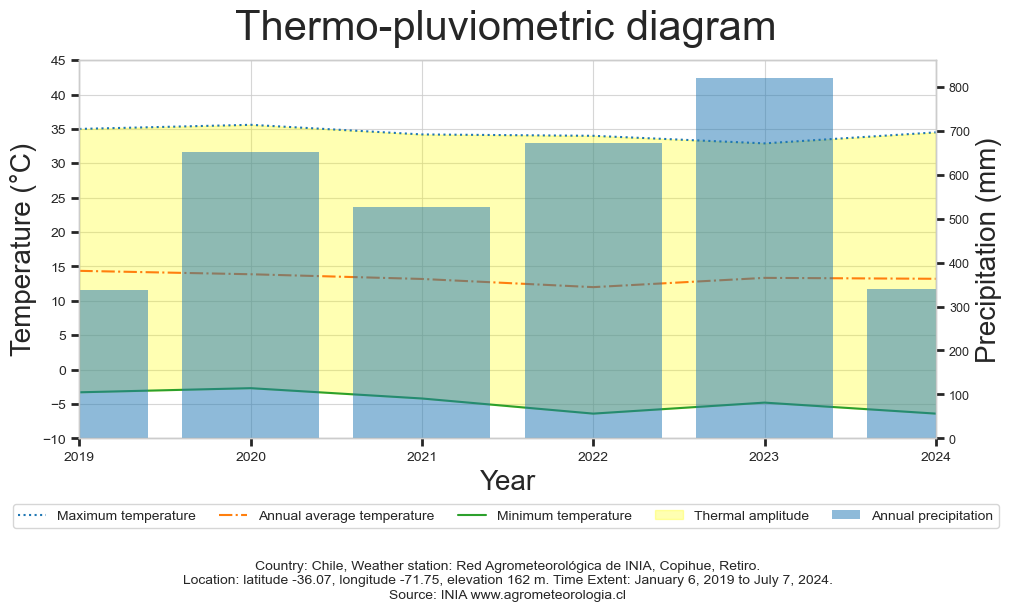

In [752]:
plt.style.use('seaborn-v0_8-whitegrid') # Use 'seaborn-v0_8-whitegrid' buil-in style.

"""
* Create 1 figure with 2 subplots (Upper Subplot for chart, lower subplot for text)
* Use constrained layout to fit plot cleanly. 
* Set figure size to 16:9 that remains the aspect ratio of choice for PowerPoint presentations.
* Set height of row 1 is 4 times that of row 2.
"""
fig, ax = plt.subplots(2,1, layout='constrained',  figsize=(10,6), height_ratios=[4, 1])

# Plot upper subplot lines
ax[0].plot(df_y['t_max'], label='Maximum temperature', linestyle=':') # plot 'time' vs 't_max' line
ax[0].plot(df_y['temp'], label='Annual average temperature', linestyle='-.' ) # plot 'time' vs temp line
ax[0].plot(df_y['t_min'], label='Minimum temperature') # plot 'time' vs 't_min' line


"""
* Shade thermal amplitude ('time' vs 't_max' and 't_min').
* Set alpha= 0.3 to soften colors for more visually appealing plots.
* Set color=yellow
"""
ax[0].fill_between(df_y.index, df_y['t_max'],df_y['t_min'],  alpha=0.3, color="yellow", label='Thermal amplitude') 

# Set upper subplot labels
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_ylabel('Temperature (°C)', fontsize=20)

# Set upper subplot Axis limits 
ax[0].set_xlim(left=2019, right=2024)

# Set upper subplot grid 
ax[0].grid(visible=True, which='minor') 

# Change upper subplot appearance of ticks, tick labels, and gridlines
ax[0].tick_params(direction='out', length=6, width=2, grid_alpha=0.8)
ax[0].set_yticks(np.arange(-10, 50, step=5))  # Set label locations

# Create a twin Axes sharing upper subplot x axis.
axt0 = ax[0].twinx()  # instantiate a second Axes (Precipitation) that shares the same x-axis
axt0.bar(df_y.index, df_y['precip'],  label='Annual precipitation', alpha=0.5) # plot 'time' vs 'precip'  bar
axt0.set_ylabel('Precipitation (mm)', fontsize=20)  # Set label
axt0.grid(visible=False) # don't show grid.
axt0.tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize=9) # Change the appearance of ticks

# Lower subplot, plot text
ax[1].text(0.5, 0, 'Country: Chile, Weather station: Red Agrometeorológica de INIA, Copihue, Retiro.\nLocation: latitude -36.07, longitude -71.75, elevation 162 m. Time Extent: January 6, 2019 to July 7, 2024.\nSource: INIA www.agrometeorologia.cl', ha='center')
ax[1].set_axis_off() # Hide all visual components of the x- and y-axis.

# Figure Annotations
fig.suptitle('Thermo-pluviometric diagram', fontsize=30) # Set figure title.
fig.legend(frameon=True, fancybox=True, bbox_to_anchor=(0, 0.09,1,0.09), ncols=5,  mode='expand') # set fig legend

##### Save Annual Thermo-pluviometric diagram

In [754]:
fig.savefig('img/annual_thermo-pluviometric.png') #Save the current figure as a png file.

#### Plot Annual Degree days

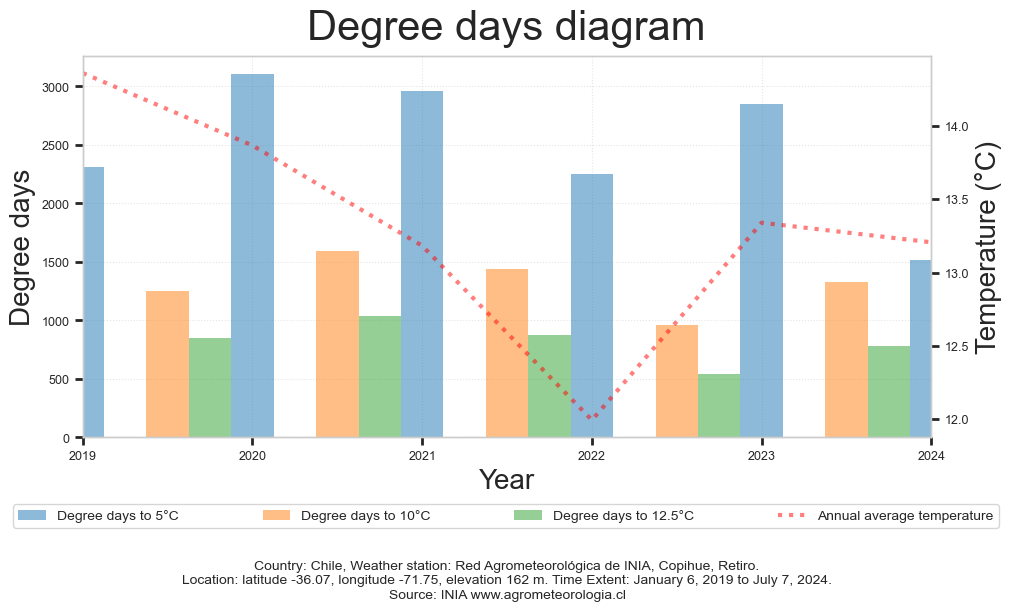

In [756]:
plt.style.use('seaborn-v0_8-whitegrid') # Use 'seaborn-v0_8-whitegrid' buil-in style.

"""
* Create 1 figure with 2 subplots (Upper Subplot for chart, lower subplot for text)
* Use constrained layout to fit plot cleanly. 
* Set figure size to 16:9 that remains the aspect ratio of choice for PowerPoint presentations.
* Set height of row 1 is 4 times that of row 2.
"""
fig, ax = plt.subplots(2,1, layout='constrained',  figsize=(10,6), height_ratios=[4, 1])

# Plot upper subplot bars
ax[0].bar(df_y.index , df_y['degree_days_to_5'], label='Degree days to 5°C', alpha=0.5, width = 0.25)
ax[0].bar(df_y.index + 0.25*2, df_y['degree_days_to_10'], label='Degree days to 10°C', alpha=0.5, width = 0.25)
ax[0].bar(df_y.index+0.25*3, df_y['degree_days_to_12.5'], label='Degree days to 12.5°C', alpha=0.5, width = 0.25)

# Set upper subplot labels
ax[0].set_xlabel("Year",  fontsize=20)
ax[0].set_ylabel("Degree days", fontsize=20)

# Set upper subplot Axis limits 
ax[0].set_xlim(left=2019, right=2024)

# Set upper subplot grid 
ax[0].grid(visible=True, which='major', linestyle=':') # set grid.

# Change upper subplot appearance of ticks, tick labels, and gridlines
ax[0].tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize=9)

# Create twin axe and Grouped bar chart
axt0 = ax[0].twinx()
axt0.plot( df_y['temp'], label='Annual average temperature', alpha=0.5,  linestyle=':', linewidth=3, color='red')
axt0.set_ylabel('Temperature (°C)', fontsize=20)  # Set label
axt0.grid(visible=False) # don't show grid.
axt0.tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize=9) # Change the appearance of ticks

# Lower subplot, plot text
ax[1].text(0.5, 0, 'Country: Chile, Weather station: Red Agrometeorológica de INIA, Copihue, Retiro.\nLocation: latitude -36.07, longitude -71.75, elevation 162 m. Time Extent: January 6, 2019 to July 7, 2024.\nSource: INIA www.agrometeorologia.cl', ha='center')
ax[1].set_axis_off() # Hide all visual components of the x- and y-axis.

# Figure Annotations
fig.suptitle('Degree days diagram', fontsize=30) # Set figure title.
fig.legend(frameon=True, fancybox=True, bbox_to_anchor=(0, 0.09,1,0.09), ncols=5,  mode='expand') # set fig legend

##### Save Annual Degree Days diagram

In [758]:
fig.savefig('img/annual_degree_days.png') #Save the current figure as a png file.

#### Plot Annual Chill Hours

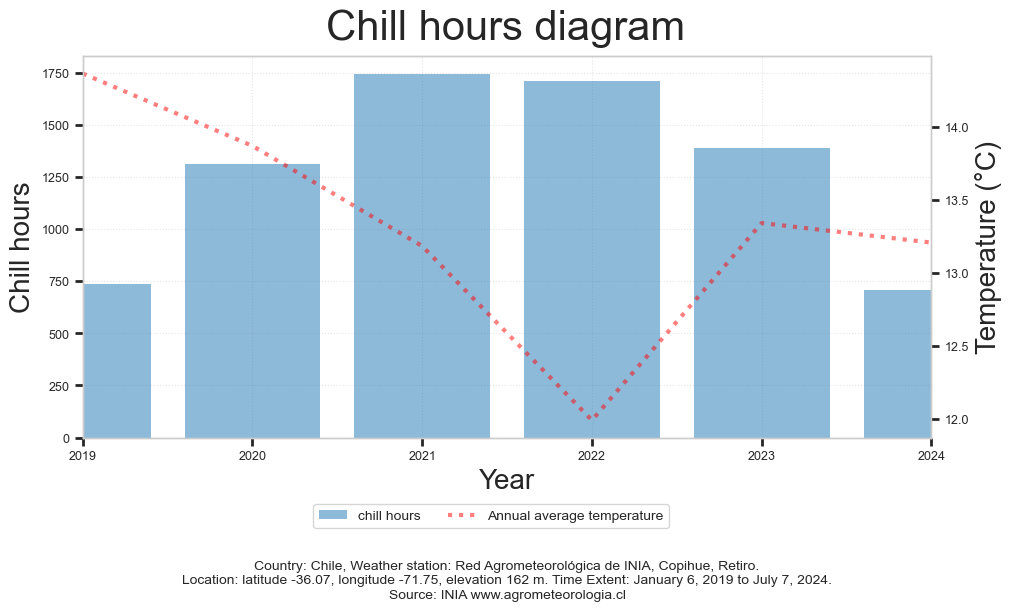

In [760]:
plt.style.use('seaborn-v0_8-whitegrid') # Use 'seaborn-v0_8-whitegrid' buil-in style.

"""
* Create 1 figure with 2 subplots (Upper Subplot for chart, lower subplot for text)
* Use constrained layout to fit plot cleanly. 
* Set figure size to 16:9 that remains the aspect ratio of choice for PowerPoint presentations.
* Set height of row 1 is 4 times that of row 2.
"""
fig, ax = plt.subplots(2,1, layout='constrained',  figsize=(10,6), height_ratios=[4, 1])

# Plot upper subplot bar
ax[0].bar(df_y.index, df_y['chill'], label='chill hours', alpha=0.5)

# Set upper subplot labels
ax[0].set_xlabel("Year",  fontsize=20)
ax[0].set_ylabel("Chill hours", fontsize=20)

# Set upper subplot Axis limits 
ax[0].set_xlim(left=2019, right=2024)

# Set upper subplot grid 
ax[0].grid(visible=True, which='major', linestyle=':') # set grid.

# Change upper subplot appearance of ticks, tick labels, and gridlines
ax[0].tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize=9)

# Create twin axe
axt0 = ax[0].twinx()
axt0.plot( df_y['temp'], label='Annual average temperature', alpha=0.5,  linestyle=':', linewidth=3, color='red')
axt0.set_ylabel('Temperature (°C)', fontsize=20)  # Set label
axt0.grid(visible=False) # don't show grid.
axt0.tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize=9) # Change the appearance of ticks

# Lower subplot, plot text
ax[1].text(0.5, 0, 'Country: Chile, Weather station: Red Agrometeorológica de INIA, Copihue, Retiro.\nLocation: latitude -36.07, longitude -71.75, elevation 162 m. Time Extent: January 6, 2019 to July 7, 2024.\nSource: INIA www.agrometeorologia.cl', ha='center')
ax[1].set_axis_off() # Hide all visual components of the x- and y-axis.

# Figure Annotations
fig.suptitle('Chill hours diagram', fontsize=30) # Set figure title.
fig.legend(frameon=True, fancybox=True, bbox_to_anchor=(0, 0.09,0.67,0.09), ncols=2) # set fig legend

##### Save Annual Chill Hours

In [762]:
fig.savefig('img/annual_chill_hours.png') #Save the current figure as a png file.

### Plot Weekly indicators
* Use 'df_34' dataframe.

#### Plot Weekly Air Temperatures Diagram

Text(0.5, 0.98, 'Weekly Air Temperatures Diagram')

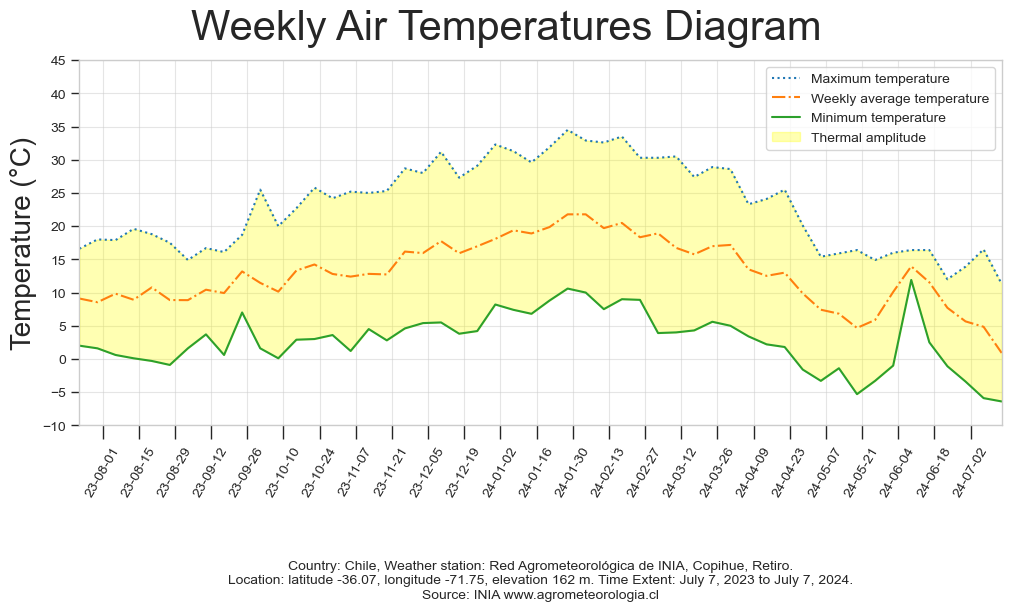

In [765]:
plt.style.use('seaborn-v0_8-whitegrid') # Use 'seaborn-v0_8-whitegrid' buil-in style.

"""
* Create 1 figure with 2 subplots (Upper Subplot for chart, lower subplot for text)
* Use constrained layout to fit plot cleanly. 
* Set figure size to 16:9 that remains the aspect ratio of choice for PowerPoint presentations.
* Set height of row 1 is 4 times that of row 2.
"""
fig, ax = plt.subplots(2,1, layout='constrained',  figsize=(10,6), height_ratios=[4, 1])

# Plot upper subplot lines
ax[0].plot(df_34['t_max'], label='Maximum temperature', linestyle=':') # plot 'time' vs 't_max' line
ax[0].plot(df_34['temp'], label='Weekly average temperature', linestyle='-.' ) # plot 'time' vs temp line
ax[0].plot(df_34['t_min'], label='Minimum temperature') # plot 'time' vs 't_min' line


"""
* Shade thermal amplitude ('time' vs 't_max' and 't_min').
* Set alpha= 0.3 to soften colors for more visually appealing plots.
* Set color=yellow
"""
ax[0].fill_between(df_34.index, df_34['t_max'],df_34['t_min'],  alpha=0.3, color="yellow", label='Thermal amplitude') 

# Set upper subplot labels
ax[0].set_ylabel('Temperature (°C)', fontsize=20)

# Set upper subplot legend
ax[0].legend(frameon=True, fancybox=True)

# Set upper subplot Axis limits 
ax[0].set_xlim(left=df_34.index.min() , right=df_34.index.max() )

# Set upper subplot grid 
ax[0].grid(visible=True, which='major', alpha=0.5) 

# Change upper subplot appearance of ticks, tick labels, and gridlines
ax[0].tick_params(axis='y', direction='out', length=6, width=1, grid_alpha=0.5)
ax[0].tick_params(axis='x', direction='out', length=10, width=1, grid_alpha=0.5, labelrotation=60)
ax[0].set_yticks(np.arange(-10, 50, step=5))  # Set Y label locations
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=2)) # handle automatic limit scaling on a weekly basis
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d')) # control the major tick label formats

# Lower subplot, plot text
ax[1].text(0.5, 0, 'Country: Chile, Weather station: Red Agrometeorológica de INIA, Copihue, Retiro.\nLocation: latitude -36.07, longitude -71.75, elevation 162 m. Time Extent: July 7, 2023 to July 7, 2024.\nSource: INIA www.agrometeorologia.cl', ha='center')
ax[1].set_axis_off() # Hide all visual components of the x- and y-axis.

# Figure Annotations
fig.suptitle('Weekly Air Temperatures Diagram', fontsize=30) # Set figure title.

##### Save Weekly Air Temperatures Diagram

In [854]:
fig.savefig('img/weekly_air_temperatures.png') #Save the current figure as a png file.

#### Plot Weekly Precipitation Diagram

Text(0.5, 0.98, 'Weekly Precipitation')

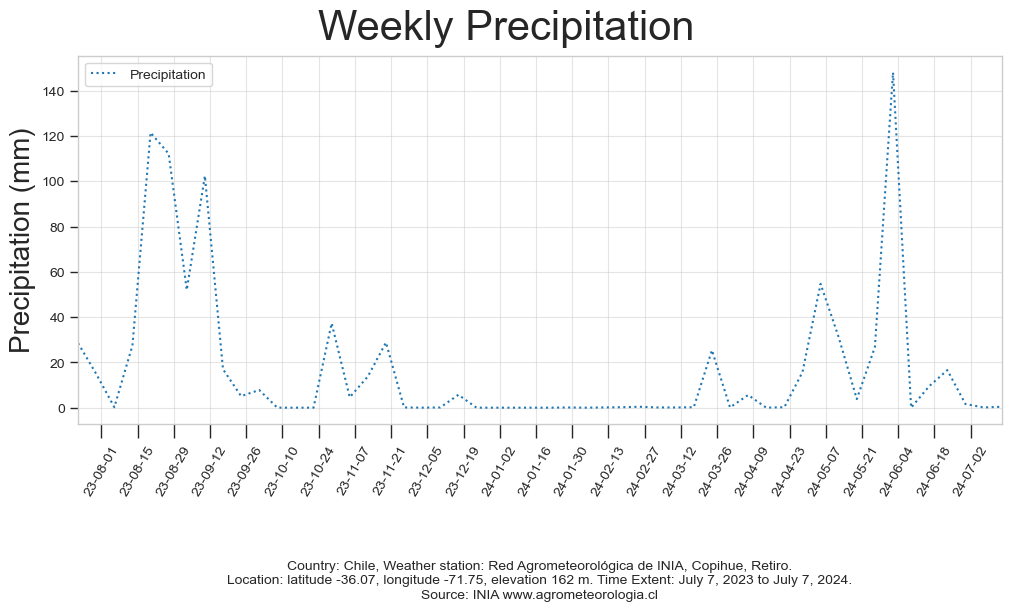

In [769]:
plt.style.use('seaborn-v0_8-whitegrid') # Use 'seaborn-v0_8-whitegrid' buil-in style.

"""
* Create 1 figure with 2 subplots (Upper Subplot for chart, lower subplot for text)
* Use constrained layout to fit plot cleanly. 
* Set figure size to 16:9 that remains the aspect ratio of choice for PowerPoint presentations.
* Set height of row 1 is 4 times that of row 2.
"""
fig, ax = plt.subplots(2,1, layout='constrained',  figsize=(10,6), height_ratios=[4, 1])

# Plot upper subplot bar
ax[0].plot(df_34.index, df_34['precip'], label='Precipitation', linestyle=':') # plot 'time' vs 't_max' line

# Set upper subplot labels
ax[0].set_ylabel('Precipitation (mm)', fontsize=20)

# Set upper subplot legend
ax[0].legend(frameon=True, fancybox=True)

# Set upper subplot Axis limits 
ax[0].set_xlim(left=df_34.index.min() , right=df_34.index.max())

# Set upper subplot grid 
ax[0].grid(visible=True, which='major', alpha=0.5) 

# Change upper subplot appearance of ticks, tick labels, and gridlines
ax[0].tick_params(axis='y', direction='out', length=6, width=1, grid_alpha=0.5)
ax[0].tick_params(axis='x', direction='out', length=10, width=1, grid_alpha=0.5, labelrotation=60)
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=2)) # handle automatic limit scaling on a weekly basis
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d')) # control the major tick label formats

# Lower subplot, plot text
ax[1].text(0.5, 0, 'Country: Chile, Weather station: Red Agrometeorológica de INIA, Copihue, Retiro.\nLocation: latitude -36.07, longitude -71.75, elevation 162 m. Time Extent: July 7, 2023 to July 7, 2024.\nSource: INIA www.agrometeorologia.cl', ha='center')
ax[1].set_axis_off() # Hide all visual components of the x- and y-axis.

# Figure Annotations
fig.suptitle('Weekly Precipitation', fontsize=30) # Set figure title.

##### Save Weekly Precipitation

In [771]:
fig.savefig('img/weekly_precipitation.png') #Save the current figure as a png file.

#### Plot Weekly Degree days

Text(0.5, 0.98, 'Weekly Degree Days')

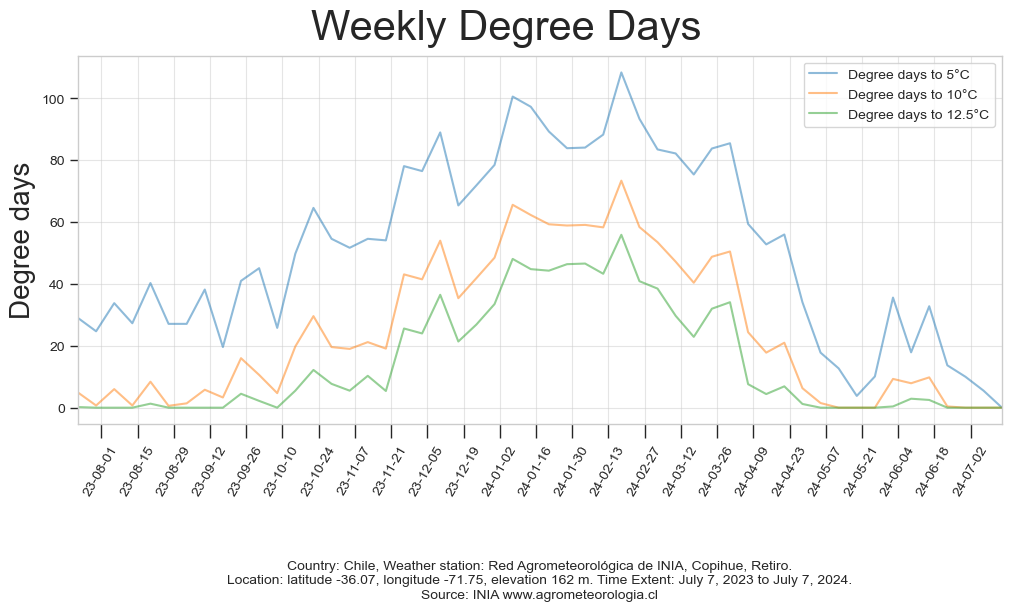

In [773]:
plt.style.use('seaborn-v0_8-whitegrid') # Use 'seaborn-v0_8-whitegrid' buil-in style.

"""
* Create 1 figure with 2 subplots (Upper Subplot for chart, lower subplot for text)
* Use constrained layout to fit plot cleanly. 
* Set figure size to 16:9 that remains the aspect ratio of choice for PowerPoint presentations.
* Set height of row 1 is 4 times that of row 2.
"""
fig, ax = plt.subplots(2,1, layout='constrained',  figsize=(10,6), height_ratios=[4, 1])

# Plot upper subplot bar
ax[0].plot(df_34.index , df_34['degree_days_to_5'], label='Degree days to 5°C', alpha=0.5)
ax[0].plot(df_34.index , df_34['degree_days_to_10'], label='Degree days to 10°C', alpha=0.5)
ax[0].plot(df_34.index, df_34['degree_days_to_12.5'], label='Degree days to 12.5°C', alpha=0.5)

# Set upper subplot labels
ax[0].set_ylabel('Degree days', fontsize=20)

# Set upper subplot legend
ax[0].legend(frameon=True, fancybox=True)

# Set upper subplot Axis limits 
ax[0].set_xlim(left=df_34.index.min() , right=df_34.index.max())

# Set upper subplot grid 
ax[0].grid(visible=True, which='major', alpha=0.5) 

# Change upper subplot appearance of ticks, tick labels, and gridlines
ax[0].tick_params(axis='y', direction='out', length=6, width=1, grid_alpha=0.5)
ax[0].tick_params(axis='x', direction='out', length=10, width=1, grid_alpha=0.5, labelrotation=60)
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=2)) # handle automatic limit scaling on a weekly basis
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d')) # control the major tick label formats

# Lower subplot, plot text
ax[1].text(0.5, 0, 'Country: Chile, Weather station: Red Agrometeorológica de INIA, Copihue, Retiro.\nLocation: latitude -36.07, longitude -71.75, elevation 162 m. Time Extent: July 7, 2023 to July 7, 2024.\nSource: INIA www.agrometeorologia.cl', ha='center')
ax[1].set_axis_off() # Hide all visual components of the x- and y-axis.

# Figure Annotations
fig.suptitle('Weekly Degree Days', fontsize=30) # Set figure title.

##### Save Weekly Precipitation

In [775]:
fig.savefig('img/weekly_degree_days.png') #Save the current figure as a png file.

#### Plot Weekly Chill hours

Text(0.5, 0.98, 'Weekly Chill Hours')

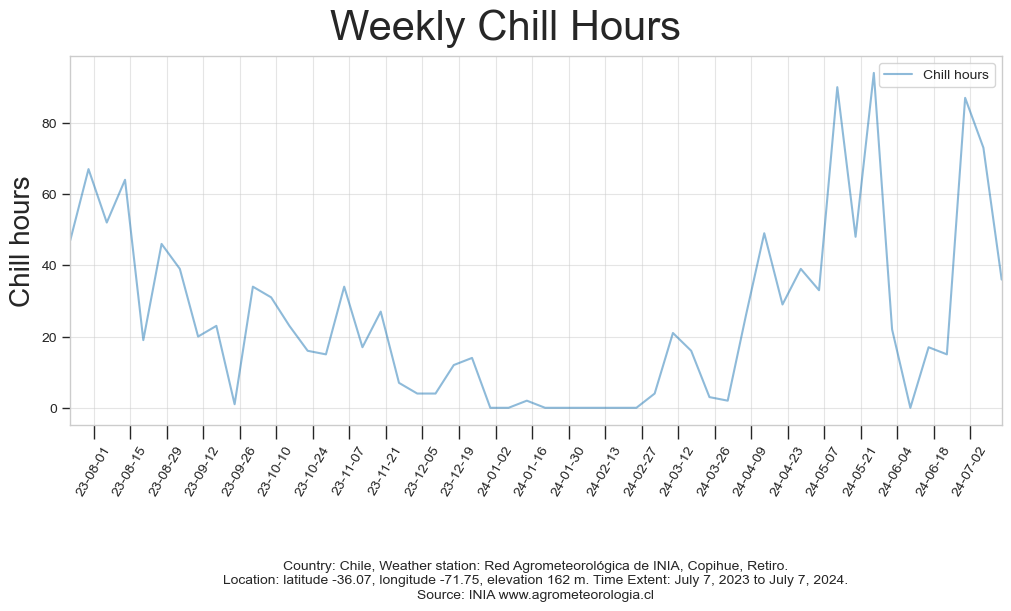

In [777]:
plt.style.use('seaborn-v0_8-whitegrid') # Use 'seaborn-v0_8-whitegrid' buil-in style.

"""
* Create 1 figure with 2 subplots (Upper Subplot for chart, lower subplot for text)
* Use constrained layout to fit plot cleanly. 
* Set figure size to 16:9 that remains the aspect ratio of choice for PowerPoint presentations.
* Set height of row 1 is 4 times that of row 2.
"""
fig, ax = plt.subplots(2,1, layout='constrained',  figsize=(10,6), height_ratios=[4, 1])

# Plot upper subplot bar
ax[0].plot(df_34.index , df_34['chill'], label='Chill hours', alpha=0.5)

# Set upper subplot labels
ax[0].set_ylabel('Chill hours', fontsize=20)

# Set upper subplot legend
ax[0].legend(frameon=True, fancybox=True)

# Set upper subplot Axis limits 
ax[0].set_xlim(left=df_34.index.min() , right=df_34.index.max())

# Set upper subplot grid 
ax[0].grid(visible=True, which='major', alpha=0.5) 

# Change upper subplot appearance of ticks, tick labels, and gridlines
ax[0].tick_params(axis='y', direction='out', length=6, width=1, grid_alpha=0.5)
ax[0].tick_params(axis='x', direction='out', length=10, width=1, grid_alpha=0.5, labelrotation=60)
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=2)) # handle automatic limit scaling on a weekly basis
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d')) # control the major tick label formats

# Lower subplot, plot text
ax[1].text(0.5, 0, 'Country: Chile, Weather station: Red Agrometeorológica de INIA, Copihue, Retiro.\nLocation: latitude -36.07, longitude -71.75, elevation 162 m. Time Extent: July 7, 2023 to July 7, 2024.\nSource: INIA www.agrometeorologia.cl', ha='center')
ax[1].set_axis_off() # Hide all visual components of the x- and y-axis.

# Figure Annotations
fig.suptitle('Weekly Chill Hours', fontsize=30) # Set figure title.

##### Save Weekly Chill Hours

In [779]:
fig.savefig('img/weekly_chill hours.png') #Save the current figure as a png file.

#### Plot Weekly Cumulative Sum for Chill Hours and Degree days

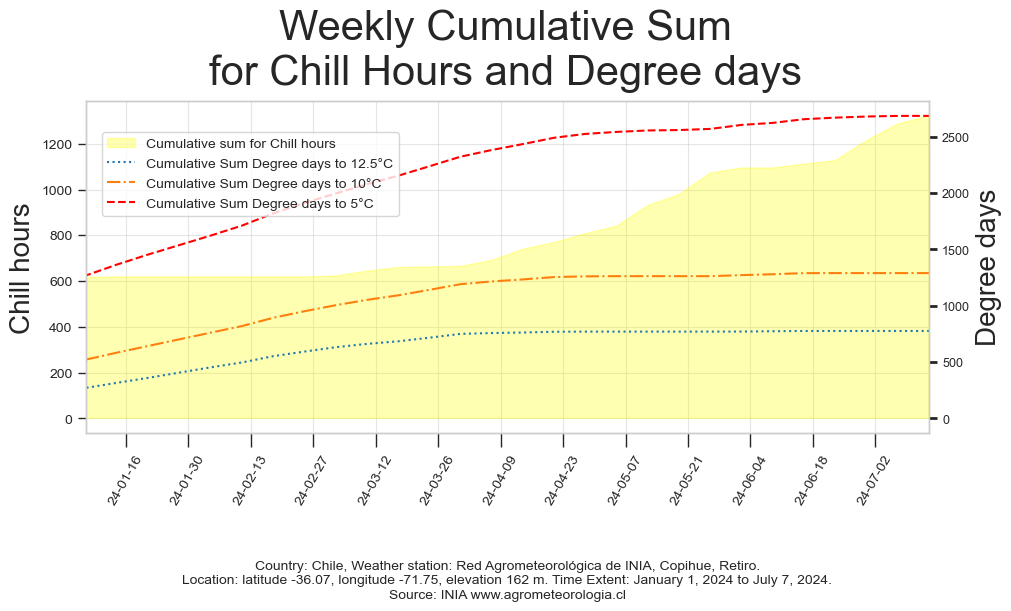

In [781]:
plt.style.use('seaborn-v0_8-whitegrid') # Use 'seaborn-v0_8-whitegrid' buil-in style.

"""
* Create 1 figure with 2 subplots (Upper Subplot for chart, lower subplot for text)
* Use constrained layout to fit plot cleanly. 
* Set figure size to 16:9 that remains the aspect ratio of choice for PowerPoint presentations.
* Set height of row 1 is 4 times that of row 2.
"""
fig, ax = plt.subplots(2,1, layout='constrained',  figsize=(10,6), height_ratios=[4, 1])

# Plot upper subplot bar
ax[0].fill_between(df_34.index, df_34['chill'].cumsum(),  alpha=0.3, color="yellow", label='Cumulative sum for Chill hours') 

# Set upper subplot labels
ax[0].set_ylabel('Chill hours', fontsize=20)

# Set upper subplot Axis limits, start 2024-5-1
ax[0].set_xlim(left=df_34.loc[df_34.index >= '2024-1-1'].index.min() , right=df_34.index.max())

# Set upper subplot grid 
ax[0].grid(visible=True, which='major', alpha=0.5) 

# Change upper subplot appearance of ticks, tick labels, and gridlines
ax[0].tick_params(axis='y', direction='out', length=6, width=1, grid_alpha=0.5)
ax[0].tick_params(axis='x', direction='out', length=10, width=1, grid_alpha=0.5, labelrotation=60)
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=2)) # handle automatic limit scaling on a weekly basis
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d')) # control the major tick label formats

# Lower subplot, plot text
ax[1].text(0.5, 0, 'Country: Chile, Weather station: Red Agrometeorológica de INIA, Copihue, Retiro.\nLocation: latitude -36.07, longitude -71.75, elevation 162 m. Time Extent: January 1, 2024 to July 7, 2024.\nSource: INIA www.agrometeorologia.cl', ha='center')
ax[1].set_axis_off() # Hide all visual components of the x- and y-axis.

# Create twin axe
axt0 = ax[0].twinx()
axt0.plot( df_34['degree_days_to_12.5'].cumsum(), label='Cumulative Sum Degree days to 12.5°C',  linestyle=':')
axt0.plot( df_34['degree_days_to_10'].cumsum(), label='Cumulative Sum Degree days to 10°C',  linestyle='-.')
axt0.plot( df_34['degree_days_to_5'].cumsum(), label='Cumulative Sum Degree days to 5°C',  linestyle='--', color='red')
axt0.set_ylabel('Degree days', fontsize=20)  # Set label
axt0.grid(visible=False) # don't show grid.
axt0.tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize=9) # Change the appearance of ticks

# Figure Annotations
fig.suptitle('Weekly Cumulative Sum\nfor Chill Hours and Degree days', fontsize=30) # Set figure title.
fig.legend(frameon=True, fancybox=True, bbox_to_anchor=(0.4, 0.8)) # set fig legend

##### Save Weekly Cumulative Sum for Chill Hours and Degree days

In [783]:
fig.savefig('img/weekly_cumsum_chill_hours_degree_days.png') #Save the current figure as a png file.